<font size = 8 color ='336EFF'>Perceptron</font>

Import Relevant Libraries

In [32]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

From sklearn.linear_model import Perceptron set max_iter, tol, and random_state to 1000, 1e-3, and 42 respectively

Load iris dataset. Select petal length and petal width as X and from iris.target create y with setosa and not setosa (e.g. y=1 if setosa and y = 0 if not setosa)

Train the perceptron

In [33]:
# your code
# Load the Iris dataset
iris = load_iris()

# Select petal length and petal width as features (X)
X = iris.data[:, [2, 3]]  # Selecting columns for petal length and petal width

# Create binary labels for Setosa and not Setosa (y)
y = (iris.target == 0).astype(int)  # 1 if setosa, 0 if not setosa

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and configure the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Fit the model to the data
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

Plot the real X and y

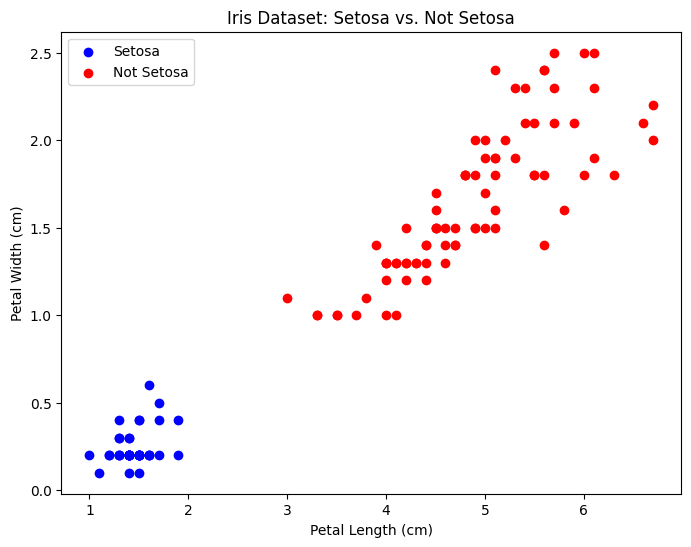

In [34]:
# your code
# Scatter plot of the real data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Setosa')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Not Setosa')

# Add labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')

# Show the plot
plt.title('Iris Dataset: Setosa vs. Not Setosa')
plt.show()

Plot X real and y predicted

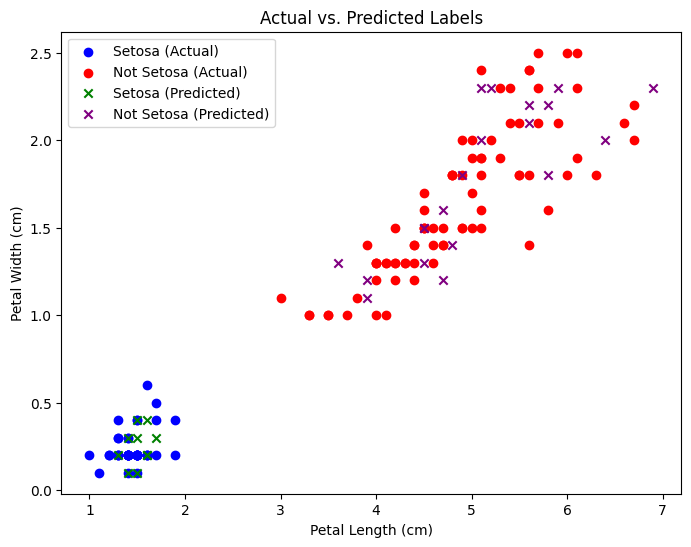

In [35]:
# your code
# Make predictions on the same data
y_predicted = perceptron.predict(X_test)

# Scatter plot of the actual data points (X) and predicted labels (y_predicted)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Setosa (Actual)')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Not Setosa (Actual)')
plt.scatter(X_test[y_predicted == 1][:, 0], X_test[y_predicted == 1][:, 1], marker='x', color='green', label='Setosa (Predicted)')
plt.scatter(X_test[y_predicted == 0][:, 0], X_test[y_predicted == 0][:, 1], marker='x', color='purple', label='Not Setosa (Predicted)')

# Add labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')

# Show the plot
plt.title('Actual vs. Predicted Labels')
plt.show()

Predict new point [[2, 0.5]]

In [36]:
# your code
# New data point to predict
new_data_point = np.array([[2, 0.5]])

# Predict the class of the new data point
prediction = perceptron.predict(new_data_point)

# Convert the prediction to a meaningful label
if prediction == 1:
    predicted_label = "Setosa"
else:
    predicted_label = "Not Setosa"

print("Predicted label for", new_data_point, ":", predicted_label)

Predicted label for [[2.  0.5]] : Setosa


Print the accuracy score

In [37]:
# your code
from sklearn.metrics import accuracy_score
# Calculate accuracy on the entire dataset (including the new data point)
y_predicted = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)

print("Accuracy on the Iris dataset:", accuracy)

Accuracy on the Iris dataset: 1.0


Calculate the confusion matrix print it and then plot it

Confusion Matrix:
[[20  0]
 [ 0 10]]


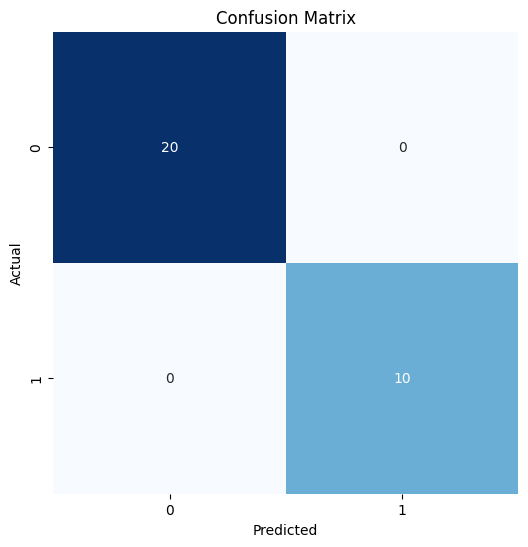

In [38]:
# your code
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
y_predicted = perceptron.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()